python3 -m venv .venv
source .venv/bin/activate
which python
.venv/bin/python

https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/

python3 -m pip install -r requirements.txt

In [1]:
import cv2

from time import sleep
from PIL import Image, ImageDraw, ImageFont

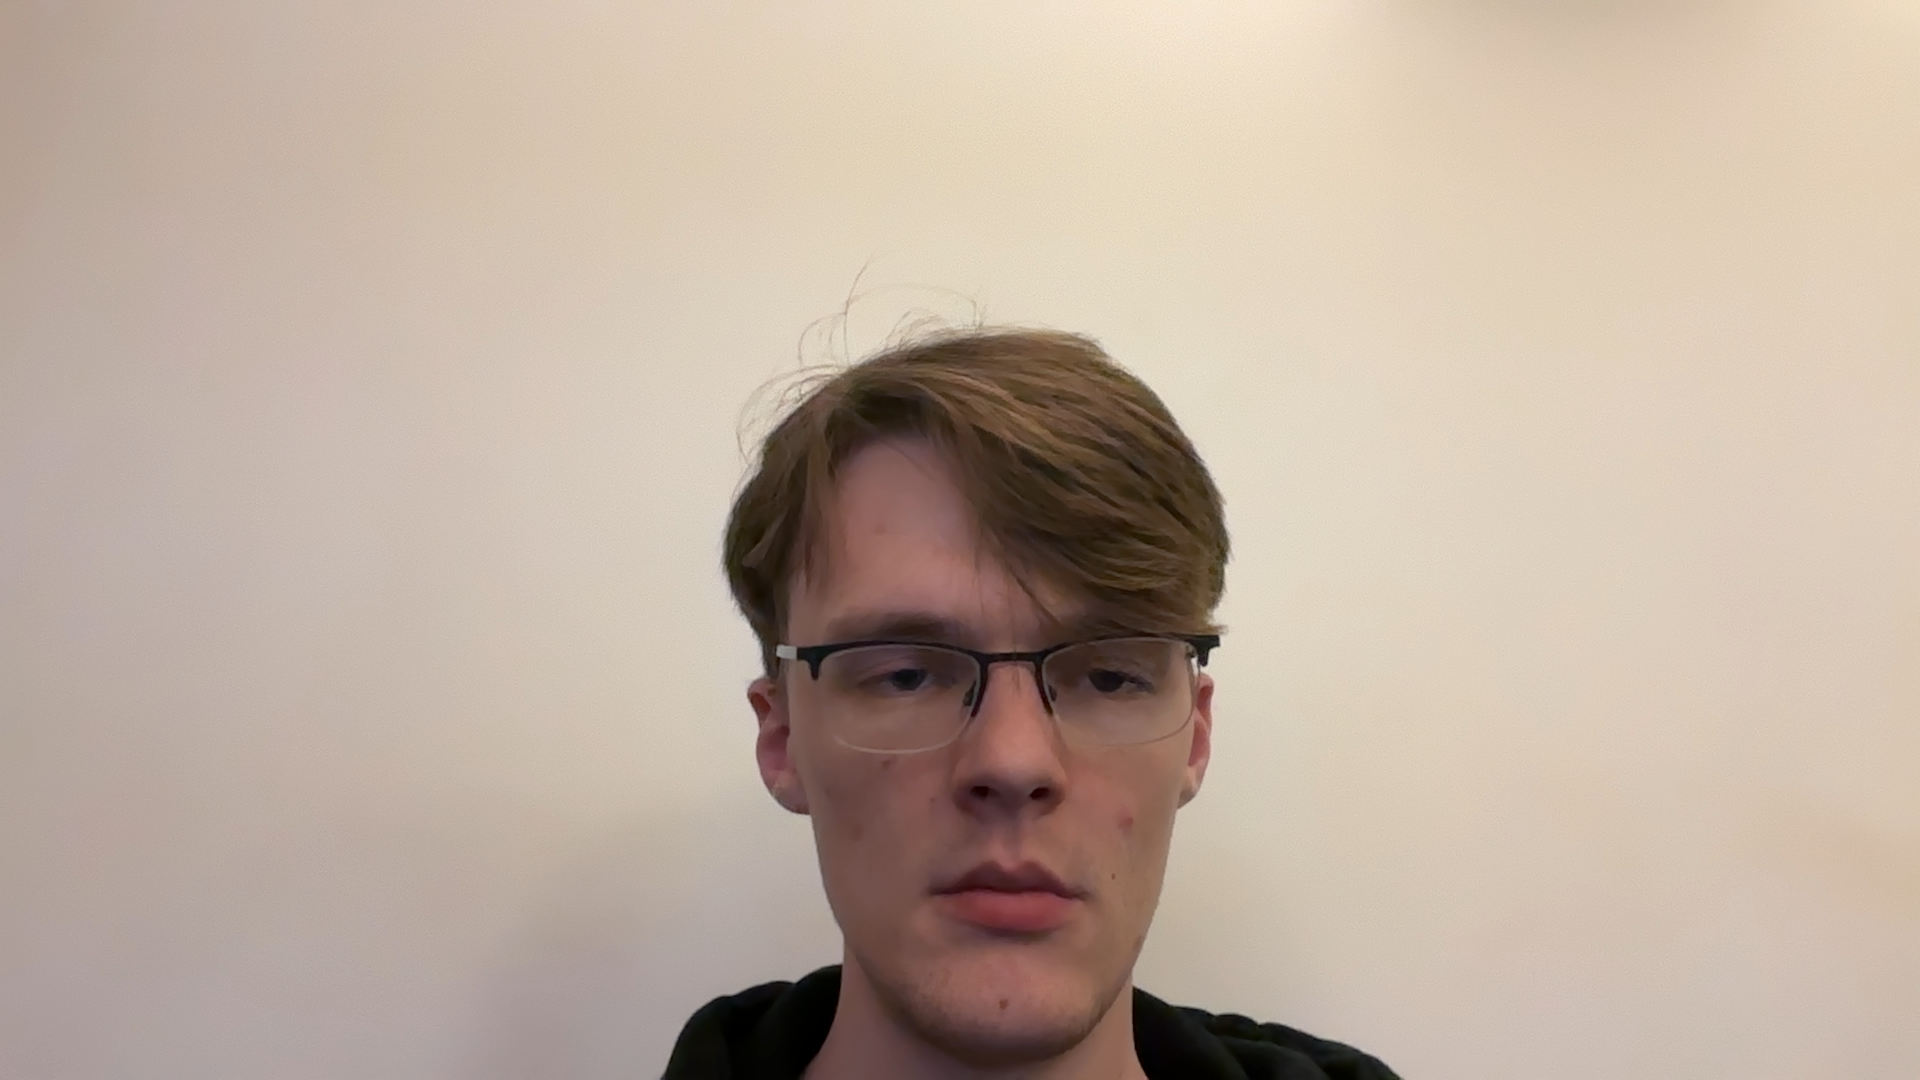

In [2]:
cap = cv2.VideoCapture(0)   # /dev/video0
sleep(2)
ret, frame = cap.read()
cap.release()

photo = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

display(photo)

In [4]:
characters = 'Ñ@#W$9876543210?!abc;:+=-,._ ' # Taken from https://play.ertdfgcvb.xyz/

def greyscale_to_index(num):
  return int(num  / 255 * (len(characters)-1))

def image_to_ascii(img):
    greyImage = img.convert('L')
    resizedImage = greyImage.resize((80,70), resample=Image.Resampling.BILINEAR)
    pixels = resizedImage.load()
    ascii = ''
    for y in range(0,resizedImage.height):
        for x in range(0,resizedImage.width):
            pixel = pixels[x,y]
            i = greyscale_to_index(pixel)
            ascii+=str(characters[i])
        ascii+='\n'
    return ascii

resized_image = photo.resize((128,64),Image.Resampling.NEAREST)
ascii_picture = image_to_ascii(resized_image)

print(ascii_picture)

aabbbbccccc;;;;;:::::::+++++++========-------,,,,,,,,,,-==++:::;;;;;;;::+++===--
aabbbcccccc;;;;;::::::+++++++++======--------,,,,,,,,,--==+++::::::::::+++====--
abbbbbccccc;;;;;:::::::+++++++========---------,-,,,,,--===+++:::::::::+++======
aabbbbcccc;;;;;;;;:::::++++=++==========---------,,-,---===++++:::::::++++======
abbbbbccccc;;;;;;::::::++++++++==========----------,----===++++++++:++++++======
abbbbbccccc;;;;;;;::::::+++++++++========---------------===+++++++++++++++======
abbbbbcccccc;;;;;;:::::::++++++++========---------------===+++++++++++++++======
bbbbbccccc;c;;;;;::::::++++++++++========-==------------====++++++++++++++======
bbbbbccccc;;;;;;;;:::::++++++++++============---------=-====+=+++++++++=++======
bbbbbbcccccc;;;;;;::::::+++++++++===========---===---==-====++++++++++++=+======
bbbbbbccccc;;;;;;;::::::+++++++++=============-----=-========+++++++++++========
bbbbbccccc;;;;;;::::::::+++++++++==============----=--=========++++++=+++======+
bbbbbcccccc;;;;;;:::::::+:++

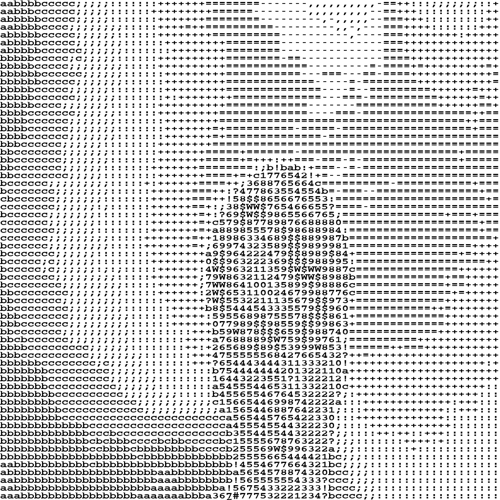

In [5]:
img = Image.new('L', (8*128,20*64), 255) #TODO dynamically calculate text size
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("../../fonts/courier.ttf", 24)
draw.text((0, 0),ascii_picture,0,font=font)
display(img.resize((500,500)))